In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

2022-12-21 00:37:07.407629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# my_rnn = RNN()
hidden_state = [0, 0, 0, 0]

sentence = "I love recurrent neural".split()

for word in sentence:
    prediction, hidden_state = my_rnn.forward(word, hidden_state)
    
next_word_prediction = prediction

['I', 'love', 'recurrent', 'neural']

In [6]:
class myRNNcell(tf.keras.layers.Layer):
    def __init__(self, rnn_units, input_dim, output_dim):
        super(myRNNcell, self).__init__()
        
        # Initialize weight matrices 
        
        self.W_xh = self.add.weight([rnn_units, input_dim])
        self.W_hh = self.add.weight([rnn_units, rnn_units])
        self.W_hy = self.add.weight([output_dim, rnn_units])
        
        # Initialize bias vectors
    
        self.b_h = self.add.weight([rnn_units, 1])
        self.b_y = self.add.weight([output_dim, 1])

        # Initialize hidden state to zeros 
        self.h = tf.zeros([rnn_units, 1])
        
    def call(self, x):
        #Update the hidden state 
        self.h = tf.math.tanh( self.W_hh * self.h + self.W_xh * x)
        
        # Compute the output
        output = self.W_hy * self.h 
        
        #Return the hidden output and hidden state
        
        return output, self.h

In [1]:
import numpy as np
from scipy.interpolate import Rbf

import matplotlib
matplotlib.use('notebookagg')
import matplotlib.pyplot as plt
from matplotlib import cm

# 2-d tests - setup scattered data
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

# plot the result
# n = plt.normalize(-2., 2.)
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()
plt.show()

ValueError: 'notebookagg' is not a valid value for backend; supported values are ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

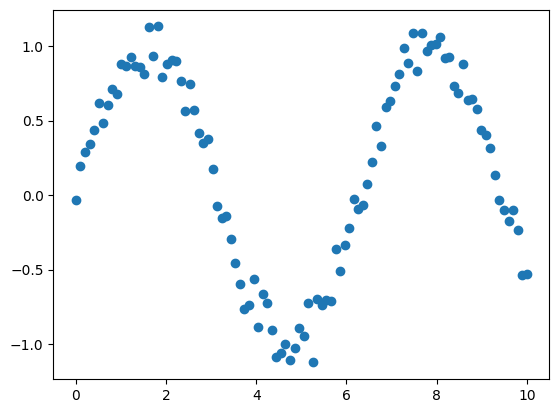

In [4]:
# Radial basis function interpolation
# determination of centroids
# 1. random selection   
# 2. k-means clustering
# 3. k-medoids clustering

# create data set
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
